In [1]:
from sys import path
from os import getcwd
print(getcwd())
path.append("/Users/walup/Library/CloudStorage/GoogleDrive-walup.legaria@gmail.com/My Drive/Cancer_Immune_Project_Final_Version/Tumor_Immune_System_Simulation/Model")

from ImmuneSystem import ImmuneAutomaton
import matplotlib.pyplot as plt
import tikzplotlib
from ImmuneSystem import AntigenType
import random
import numpy as np

import matplotlib.patches as mpatches

/Users/walup/Library/CloudStorage/GoogleDrive-walup.legaria@gmail.com/My Drive/Cancer_Immune_Project_Final_Version/Tumor_Immune_System_Simulation/Tests


## Example images

In [32]:
plt.rcParams['text.usetex'] = True

automatonWidth = 100
automatonHeight = 50

immuneSystem = ImmuneAutomaton(automatonWidth, automatonHeight, AntigenType.EXTERNAL)
immuneSystem.minTCellProductionRate = 1
immuneSystem.maxTCellProductionRate = 4
immuneSystem.tCellProductionRate = 1
immuneSystem.maxNTCells = 100

immuneSystem.rHelper = 0.005
immuneSystem.rBCell = 0.01
immuneSystem.rAntibody = 0.1




nSteps = 250
initialFrame = np.zeros((automatonHeight, automatonWidth))
finalFrame = np.zeros((automatonHeight, automatonWidth))

#Initialize the antigen.
antigenPositions = np.zeros((automatonHeight, automatonWidth))
colonyRadius = 5
nColonies = 15

for i in range(0,nColonies):
    xCenter = int(automatonWidth/2) + random.random()*(int(automatonWidth/2) -2*colonyRadius)
    yCenter = 2*colonyRadius + random.random()*(automatonHeight -2*colonyRadius)
    
    for s in range(0,automatonHeight):
        for l in range(0,automatonWidth):
            dst = np.sqrt((s - yCenter)**2 + (l - xCenter)**2)
            if(dst < colonyRadius):
                antigenPositions[s,l] = 1
immuneSystem.setAntigenPositions(antigenPositions)
initialFrame = immuneSystem.getRefinedPicture()
                
    



for i in range(0,nSteps):
    immuneSystem.stepImmuneAutomaton()
    if(i%100 == 0):
        print(i)

finalFrame = immuneSystem.getRefinedPicture()





0
100
200


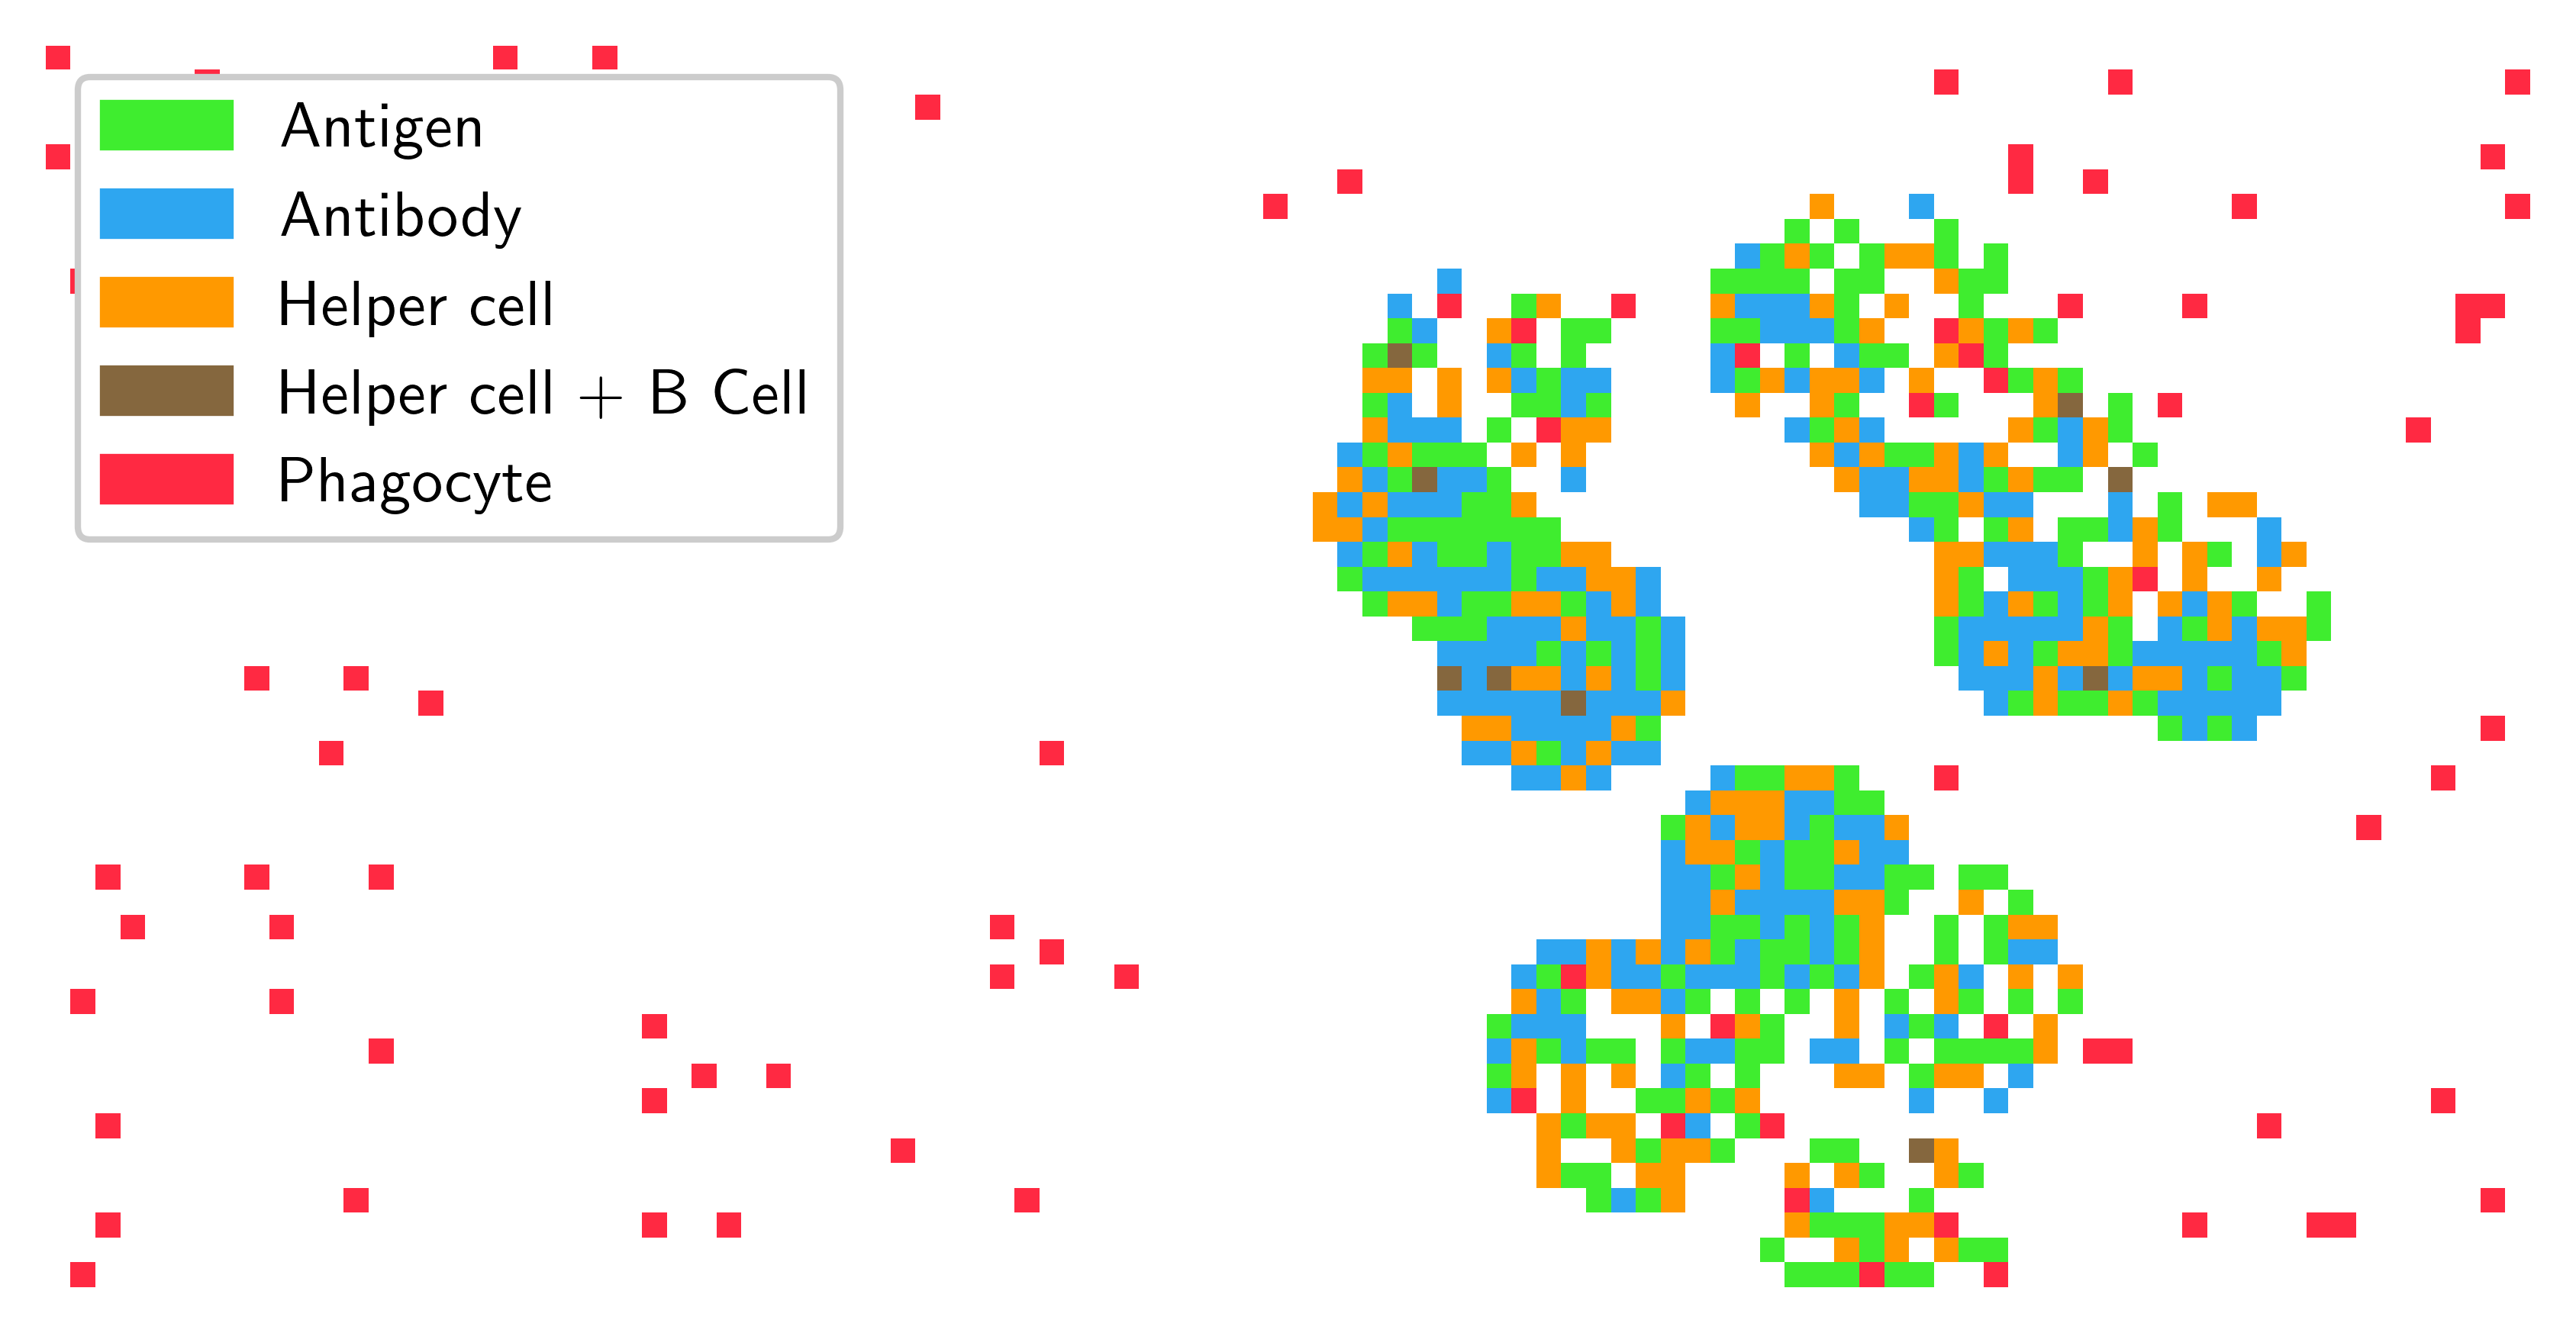

In [33]:
pAntigen= mpatches.Patch(color=[63/255, 237/255, 47/255], label='Antigen')
pAntibody= mpatches.Patch(color=[46/255, 166/255, 240/255], label='Antibody')
pHelper= mpatches.Patch(color=[255/255, 153/255, 0/255], label='Helper cell')
pBCell = mpatches.Patch(color=[133/255, 103/255, 62/255], label='Helper cell + B Cell')
pMacrophage = mpatches.Patch(color=[255/255, 41/255, 66/255], label='Phagocyte')

fig = plt.figure(figsize = (7,10), dpi = 600)
plt.imshow(finalFrame)
plt.axis('off')
plt.legend(handles=[pAntigen, pAntibody, pHelper, pBCell, pMacrophage],loc='upper left',framealpha=1)


plt.savefig('immune_demo_a.pdf',bbox_inches='tight')

In [29]:
automatonWidth = 100
automatonHeight = 50

immuneSystem = ImmuneAutomaton(automatonWidth, automatonHeight, AntigenType.CELL)
immuneSystem.minTCellProductionRate = 1
immuneSystem.maxTCellProductionRate = 4
immuneSystem.tCellProductionRate = 1
immuneSystem.maxNTCells = 100

immuneSystem.rHelper = 0.005
immuneSystem.rBCell = 0.01
immuneSystem.rAntibody = 0.1




nSteps = 250
initialFrame = np.zeros((automatonHeight, automatonWidth))
finalFrame = np.zeros((automatonHeight, automatonWidth))

#Initialize the antigen.
antigenPositions = np.zeros((automatonHeight, automatonWidth))
colonyRadius = 12
nColonies = 1

for i in range(0,nColonies):
    xCenter = int(automatonWidth/2) + random.random()*(int(automatonWidth/2) -2*colonyRadius)
    yCenter = 2*colonyRadius + random.random()*(automatonHeight -2*colonyRadius)
    
    for s in range(0,automatonHeight):
        for l in range(0,automatonWidth):
            dst = np.sqrt((s - yCenter)**2 + (l - xCenter)**2)
            if(dst < colonyRadius):
                antigenPositions[s,l] = 1
immuneSystem.setAntigenPositions(antigenPositions)
initialFrame = immuneSystem.getRefinedPicture()
                
    



for i in range(0,nSteps):
    immuneSystem.stepImmuneAutomaton()
    if(i%100 == 0):
        print(i)

finalFrame = immuneSystem.getRefinedPicture()




0
100
200


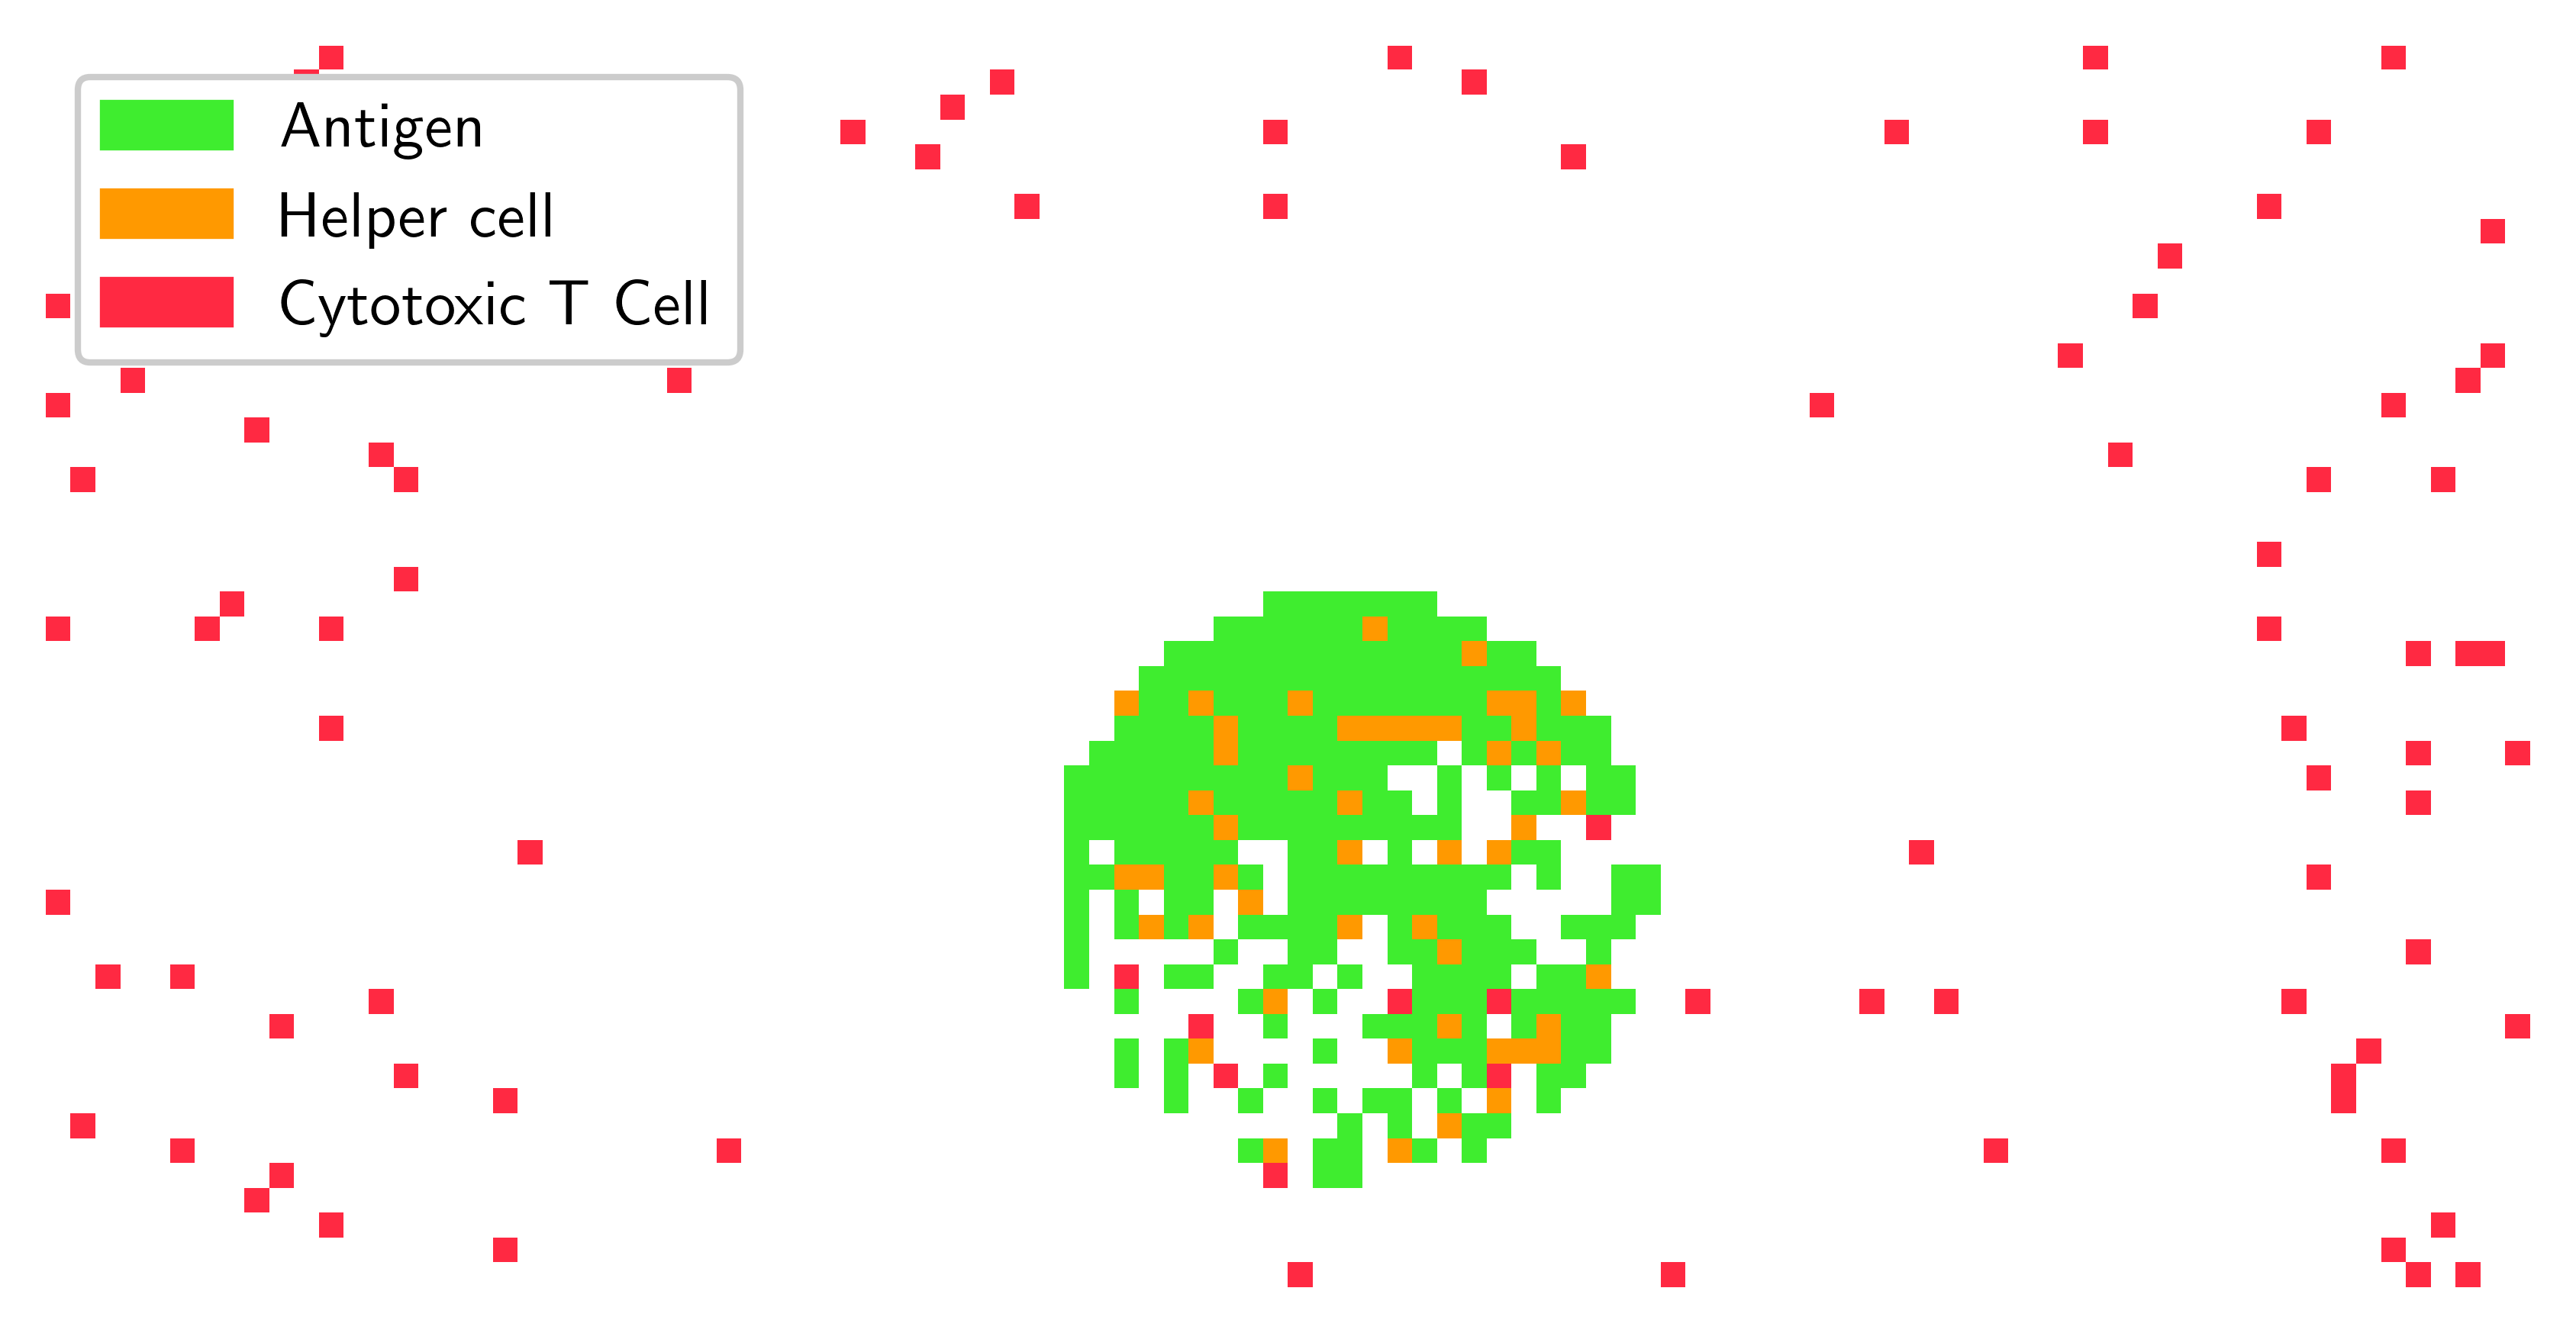

In [30]:
pAntigen= mpatches.Patch(color=[63/255, 237/255, 47/255], label='Antigen')
pHelper= mpatches.Patch(color=[255/255, 153/255, 0/255], label='Helper cell')
pMacrophage = mpatches.Patch(color=[255/255, 41/255, 66/255], label='Cytotoxic T Cell')

fig = plt.figure(figsize = (7,10), dpi = 600)
plt.imshow(finalFrame)
plt.axis('off')
plt.legend(handles=[pAntigen, pHelper, pMacrophage],loc='upper left',framealpha=1)


plt.savefig('immune_demo_b.pdf',bbox_inches='tight')

## Automaton Evolution Examples

In [43]:
plt.rcParams['text.usetex'] = True

automatonWidth = 100
automatonHeight = 100

immuneSystem = ImmuneAutomaton(automatonWidth, automatonHeight, AntigenType.EXTERNAL)
immuneSystem.minTCellProductionRate = 1
immuneSystem.maxTCellProductionRate = 4
immuneSystem.tCellProductionRate = 1
immuneSystem.maxNTCells = 300

immuneSystem.rHelper = 0.005
immuneSystem.rBCell = 0.01
immuneSystem.rAntibody = 0.1

nFrames = 6
frames = np.zeros((automatonHeight, automatonWidth, 3, nFrames))
nSteps = 1200
frameIndexes = []
stepSize = int(nSteps/6)
size = 0
for i in range(0,6):
    frameIndexes.append(size)
    size = size + stepSize

#Initialize the antigen.
antigenPositions = np.zeros((automatonHeight, automatonWidth))
colonyRadius = 6
nColonies = 5

for i in range(0,nColonies):
    xCenter = 3*colonyRadius + random.random()*(automatonWidth -3*colonyRadius)
    yCenter = 3*colonyRadius + random.random()*(automatonHeight -3*colonyRadius)
    
    for s in range(0,automatonHeight):
        for l in range(0,automatonWidth):
            dst = np.sqrt((s - yCenter)**2 + (l - xCenter)**2)
            if(dst < colonyRadius):
                antigenPositions[s,l] = 1
immuneSystem.setAntigenPositions(antigenPositions)

cellCounts = np.zeros((nSteps,5))


frameInd = 0

for i in range(0,nSteps):
    cellCounts[i,:] = immuneSystem.getCellCounts()
    immuneSystem.stepImmuneAutomaton()
    if(i in frameIndexes):
        frames[:,:,:,frameInd] = immuneSystem.getRefinedPicture()
        frameInd = frameInd + 1


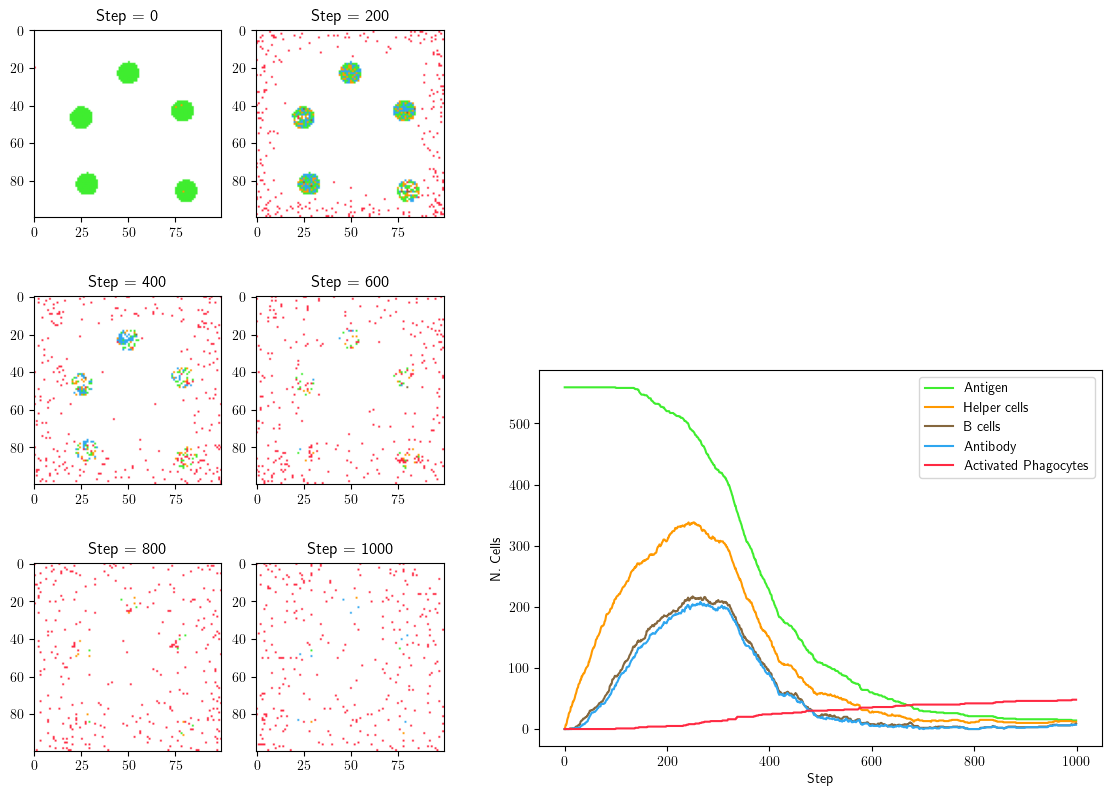

In [44]:
fig = plt.figure(figsize = (11,8),constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1.4])

ax1 = subfigs[0].subplots(3,2)
ax1[0,0].imshow(frames[:,:,:,0])
ax1[0,0].set_title("Step = "+str(frameIndexes[0]))
ax1[0,1].imshow(frames[:,:,:,1])
ax1[0,1].set_title("Step = "+str(frameIndexes[1]))
ax1[1,0].imshow(frames[:,:,:,2])
ax1[1,0].set_title("Step = "+str(frameIndexes[2]))
ax1[1,1].imshow(frames[:,:,:,3])
ax1[1,1].set_title("Step = "+str(frameIndexes[3]))
ax1[2,0].imshow(frames[:,:,:,4])
ax1[2,0].set_title("Step = "+str(frameIndexes[4]))
ax1[2,1].imshow(frames[:,:,:,5])
ax1[2,1].set_title("Step = "+str(frameIndexes[5]))

ax2 = subfigs[1].subplots(2,1)
subfigs[1].delaxes(ax2[0])
ax2[1].plot(cellCounts[0:1000,0],label = "Antigen", color = [63/255, 237/255, 47/255])
ax2[1].plot(cellCounts[0:1000,1], label = "Helper cells", color = [255/255, 153/255, 0/255])
ax2[1].plot(cellCounts[0:1000,2], label = "B cells", color = [133/255, 103/255, 62/255])
ax2[1].plot(cellCounts[0:1000,3],label = "Antibody", color = [46/255, 166/255, 240/255])
ax2[1].plot(cellCounts[0:1000,4], label = "Activated Phagocytes", color = [255/255, 41/255, 66/255])
ax2[1].set_xlabel("Step")
ax2[1].set_ylabel("N. Cells")
ax2[1].legend()

plt.savefig("immune_humoral_simulation.pdf",format="pdf", bbox_inches="tight")

In [66]:
plt.rcParams['text.usetex'] = True

automatonWidth = 75
automatonHeight = 75

immuneSystem = ImmuneAutomaton(automatonWidth, automatonHeight, AntigenType.CELL)
immuneSystem.minTCellProductionRate = 1
immuneSystem.maxTCellProductionRate = 4
immuneSystem.tCellProductionRate = 2
immuneSystem.maxNTCells = 200

immuneSystem.rHelper = 0.05
immuneSystem.rBCell = 0.01
immuneSystem.rAntibody = 0.1

nFrames = 6
frames = np.zeros((automatonHeight, automatonWidth, 3, nFrames))
nSteps = 1200
frameIndexes = []
stepSize = int(nSteps/6)
size = 0
for i in range(0,6):
    frameIndexes.append(size)
    size = size + stepSize

#Initialize the antigen.
antigenPositions = np.zeros((automatonHeight, automatonWidth))
colonyRadius = 15
nColonies = 1

xCenter = int(automatonWidth/2)
yCenter = int(automatonHeight/2)
    
for s in range(0,automatonHeight):
    for l in range(0,automatonWidth):
        dst = np.sqrt((s - yCenter)**2 + (l - xCenter)**2)
        if(dst < colonyRadius):
            antigenPositions[s,l] = 1
immuneSystem.setAntigenPositions(antigenPositions)

cellCounts = np.zeros((nSteps,5))


frameInd = 0

for i in range(0,nSteps):
    cellCounts[i,:] = immuneSystem.getCellCounts()
    immuneSystem.stepImmuneAutomaton()
    if(i in frameIndexes):
        frames[:,:,:,frameInd] = immuneSystem.getRefinedPicture()
        frameInd = frameInd + 1

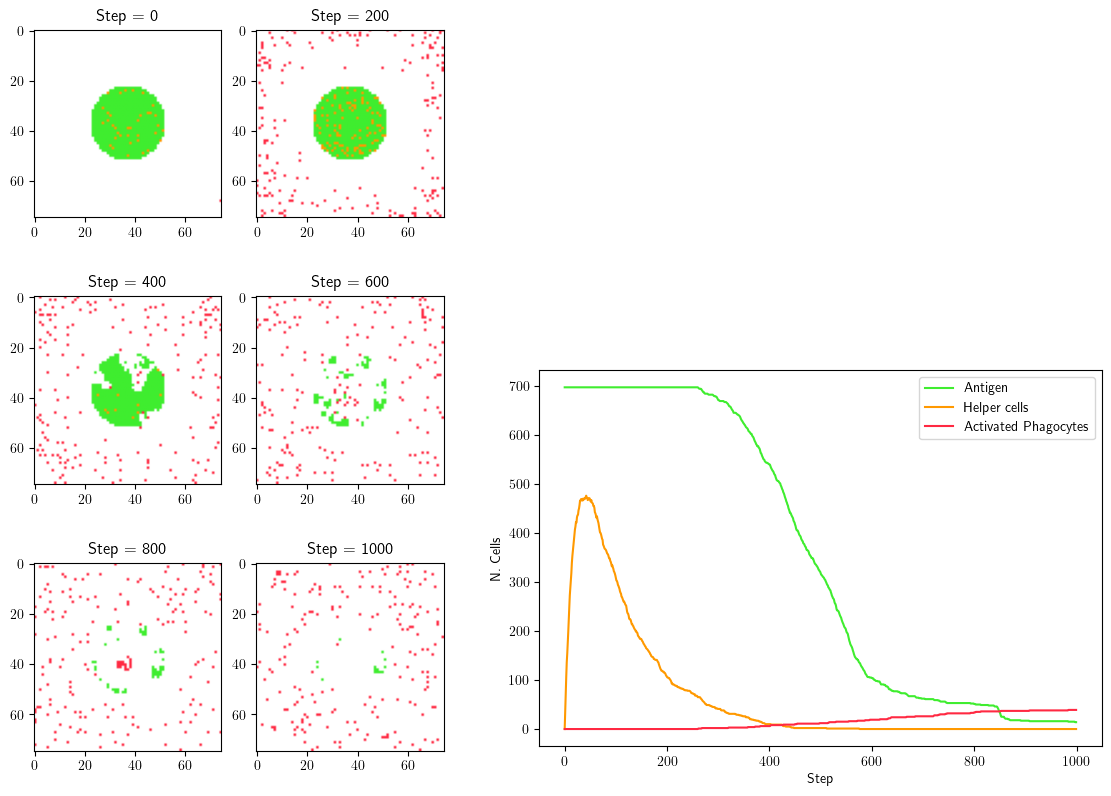

In [67]:
fig = plt.figure(figsize = (11,8),constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1.4])

ax1 = subfigs[0].subplots(3,2)
ax1[0,0].imshow(frames[:,:,:,0])
ax1[0,0].set_title("Step = "+str(frameIndexes[0]))
ax1[0,1].imshow(frames[:,:,:,1])
ax1[0,1].set_title("Step = "+str(frameIndexes[1]))
ax1[1,0].imshow(frames[:,:,:,2])
ax1[1,0].set_title("Step = "+str(frameIndexes[2]))
ax1[1,1].imshow(frames[:,:,:,3])
ax1[1,1].set_title("Step = "+str(frameIndexes[3]))
ax1[2,0].imshow(frames[:,:,:,4])
ax1[2,0].set_title("Step = "+str(frameIndexes[4]))
ax1[2,1].imshow(frames[:,:,:,5])
ax1[2,1].set_title("Step = "+str(frameIndexes[5]))

ax2 = subfigs[1].subplots(2,1)
subfigs[1].delaxes(ax2[0])
ax2[1].plot(cellCounts[0:1000,0],label = "Antigen", color = [63/255, 237/255, 47/255])
ax2[1].plot(cellCounts[0:1000,1], label = "Helper cells", color = [255/255, 153/255, 0/255])
ax2[1].plot(cellCounts[0:1000,4], label = "Activated Phagocytes", color = [255/255, 41/255, 66/255])
ax2[1].set_xlabel("Step")
ax2[1].set_ylabel("N. Cells")
ax2[1].legend()

plt.savefig("immune_cell_mediated_simulation.pdf",format="pdf", bbox_inches="tight")